# Übung 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1) Fourier Transformation

In [4]:
def dft(g):
    return np.array([
        1 / len(g) * np.sum([
            g[n] * np.exp(-1j * 2 * np.pi * ((n * k) / len(g)))
            for n in range(len(g))
        ])
        for k in range(len(g))
    ])

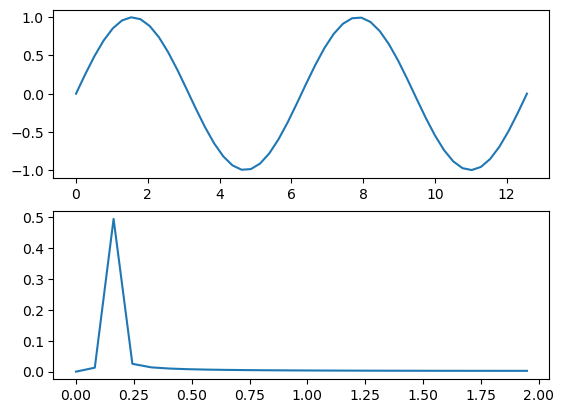

In [5]:
N = 50
stop = 4 * np.pi
step = stop / N
t = np.linspace(0, stop, N)
signal = np.sin(t)

Y = dft(signal)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, signal)

# np.abs(Y) statt Y.real
# [:N // 2] da nur die erste Hälfte der Werte Abtasttheorem erfüllt
# 2*np.pi in X achse, um Hz zu bekommen
ax[1].plot(np.linspace(0, 1 / step, N)[:N // 2], np.abs(Y)[:N // 2])
plt.show()

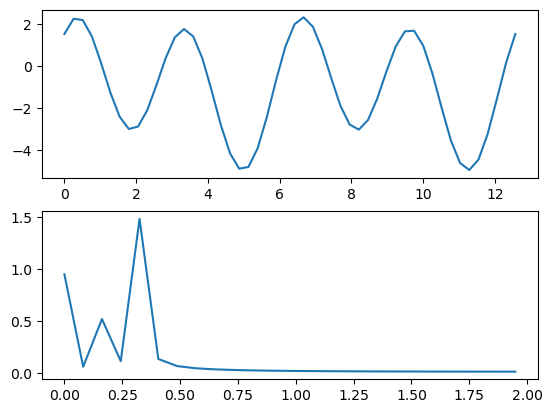

In [6]:
N = 50
stop = 4 * np.pi
step = stop / N
t = np.linspace(0, stop, N)

signal = np.sin(t) + 3 * np.sin(2 * t + 1) - 1

Y = dft(signal)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, signal)

# np.abs(Y) statt Y.real
# [:N // 2] da nur die erste Hälfte der Werte Abtasttheorem erfüllt
# 2*np.pi in X achse, um Hz zu bekommen
ax[1].plot(np.linspace(0,  1 / step, N)[:N // 2], np.abs(Y)[:N // 2])
plt.show()

## 2) Box Filter

In [7]:
img = plt.imread('../images/Mandrill.jpg')
# Frage liest cv2.imread die Kanäle andersrum oder was?

In [8]:
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 10000, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]])

normalized_kernel = kernel / kernel.sum()

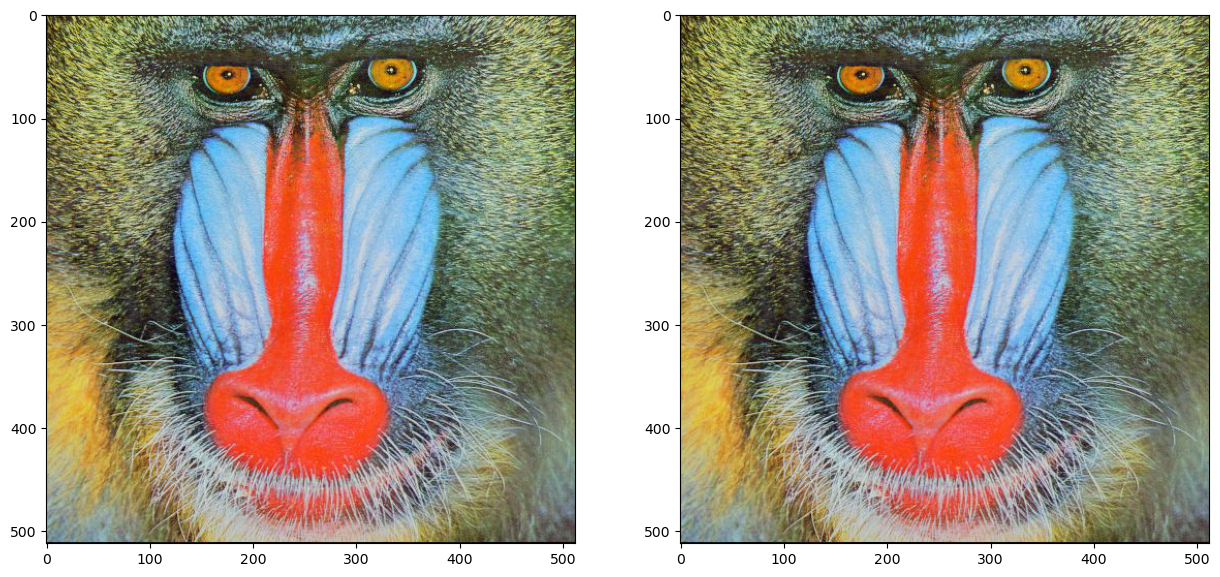

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(img)
ax[1].imshow(cv2.filter2D(img, -1, normalized_kernel))
plt.show()

## 3) Implementierung des Gaußfilters

In [10]:
def gaussian_kernel(size, sigma):
    if size % 2 == 0: raise Exception("Filter bitte nur mit ungerader Größe")
    x = np.linspace(-(size - 1) / 2, (size - 1) / 2, size)
    gauss_1d = np.exp(-0.5 * np.square(x) / np.square(sigma))
    gauss_2d = np.outer(gauss_1d, gauss_1d)
    gauss_2d_normalized = gauss_2d / gauss_2d.sum()
    return gauss_2d_normalized

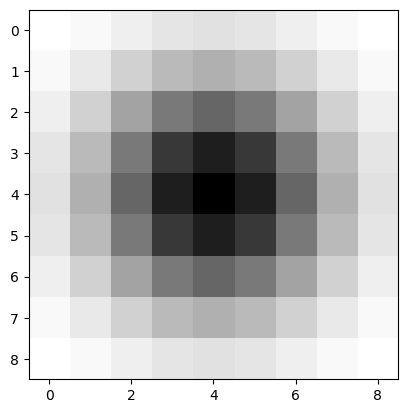

In [11]:
plt.imshow(gaussian_kernel(9, 2), cmap='binary')

In [12]:
img = plt.imread('../images/Mandrill.jpg')

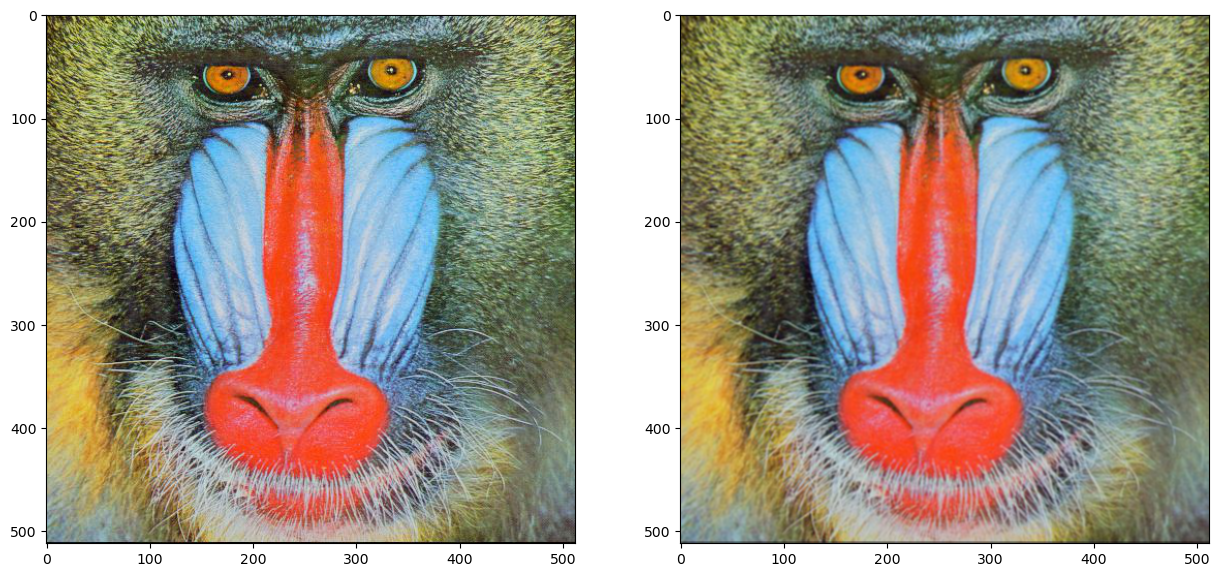

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(img)
ax[1].imshow(cv2.filter2D(img, -1, gaussian_kernel(3, 1)))
plt.show()

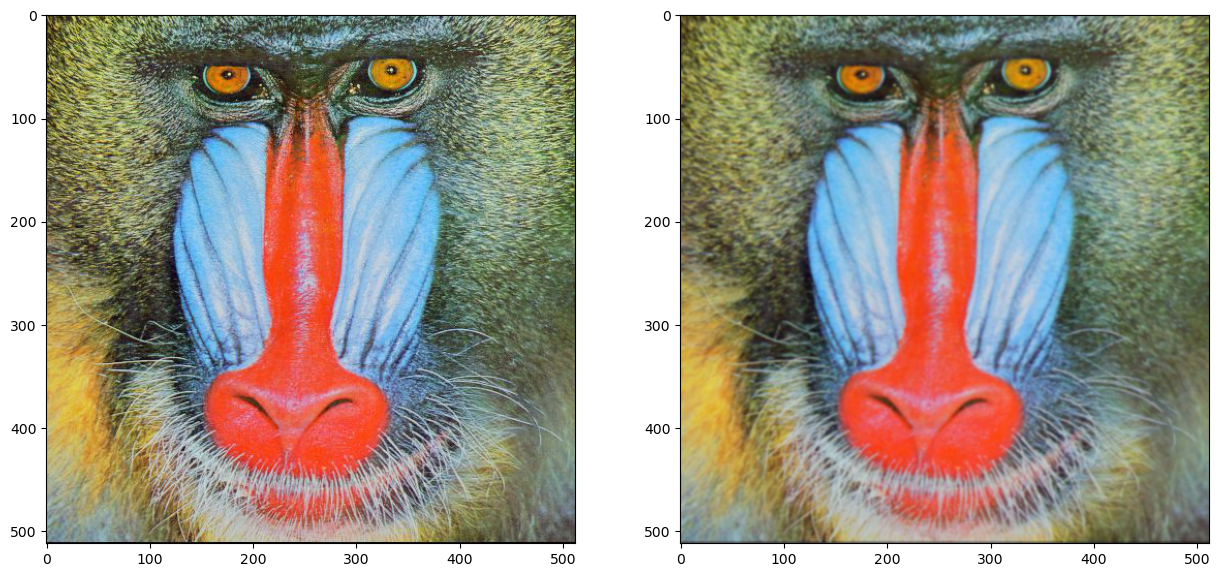

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(img)
ax[1].imshow(cv2.filter2D(img, -1, gaussian_kernel(7, 1)))
plt.show()

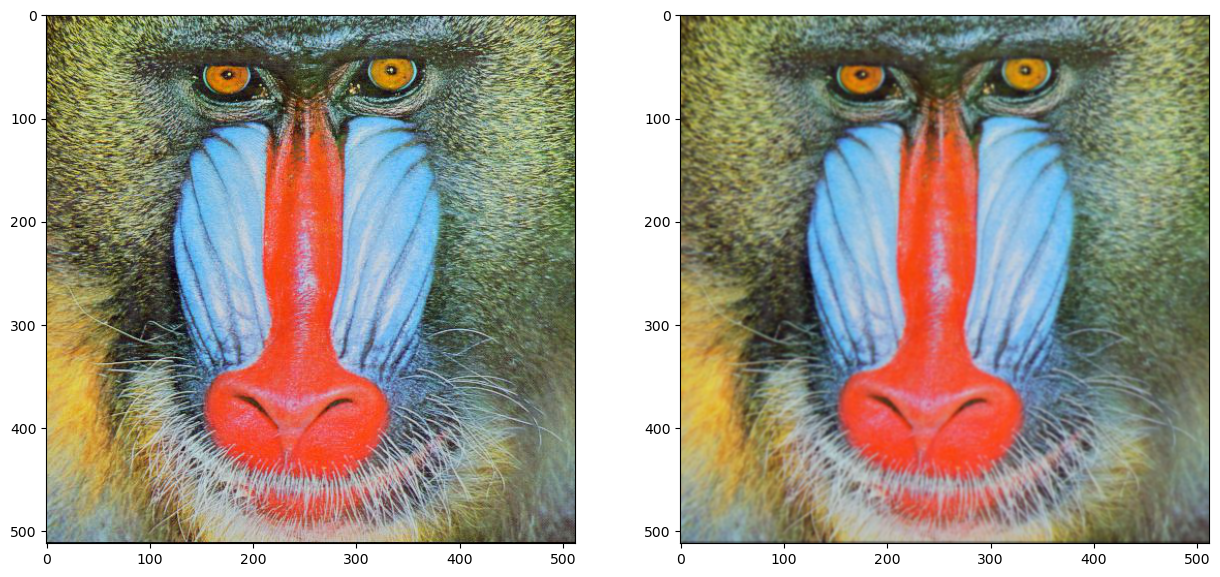

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(img)
ax[1].imshow(cv2.filter2D(img, -1, gaussian_kernel(15, 1)))
plt.show()